In [1]:
import pandas as pd
import sys
from pyspark.sql import SparkSession

sys.path.insert(0,"../utils.zip")
from utils.spark_utils import spark_session

spark = spark_session()
#spark = SparkSession.builder.getOrCreate()

%load_ext autoreload
%autoreload 2

from utils.gf_utils import *
from utils.df_utils import *
from utils.draw_utils import *
from utils.spark_utils import *
from utils.read_write_utils import *
from pyspark.sql import functions as F
%config InlineBackend.figure_format = 'retina'


In [2]:
spark.sparkContext.addPyFile("../utils.zip")


In [3]:
spark

In [4]:
gf_domip = gf_read_parquet( spark, "/Users/olaya/Documents/Master/TFM/output_fraud/graph_domain_ip_all_180208" )


 Leemos parquet el grafo  en el path :/Users/olaya/Documents/Master/TFM/output_fraud/graph_domain_ip_all_180208


In [6]:
gf_domdom = gf_read_parquet( spark, "/Users/olaya/Documents/Master/TFM/output_fraud/graph_domain_domain" )

 Leemos parquet el grafo  en el path :/Users/olaya/Documents/Master/TFM/output_fraud/graph_domain_domain


In [12]:
gf_domdom.edges.select(F.col("src.id").alias("src"),F.col("dst.id").alias("dst"),F.col("edge_weight")).show()

+--------------------+--------------------+-----------+
|                 src|                 dst|edge_weight|
+--------------------+--------------------+-----------+
|jiubang.fastestfl...|emoji.keyboard.em...|          0|
|enflick.android.t...|emoji.keyboard.em...|          1|
|emoji.keyboard.em...|enflick.android.t...|          0|
|emoji.keyboard.to...|emoji.keyboard.em...|          1|
|emoji.keyboard.em...|kitkatandroid.key...|          0|
|kitkatandroid.key...|emoji.keyboard.em...|          0|
| latininput.keyboard|emoji.keyboard.em...|          1|
|emoji.keyboard.em...| latininput.keyboard|          0|
|emoji.keyboard.to...|jiubang.fastestfl...|          1|
|jiubang.fastestfl...|emoji.keyboard.to...|          0|
|jiubang.fastestfl...|enflick.android.t...|          0|
|enflick.android.t...|jiubang.fastestfl...|          1|
|    jiubang.go.music|emoji.keyboard.em...|          1|
|emoji.keyboard.em...|    jiubang.go.music|          0|
|kitkatandroid.key...|jiubang.fastestfl...|     

In [16]:
gf_domdom.edges.collect()


[Row(src=Row(id='jiubang.fastestflashlight'), dst=Row(id='emoji.keyboard.emoticonkeyboard'), edge_weight=0),
 Row(src=Row(id='enflick.android.textnow'), dst=Row(id='emoji.keyboard.emoticonkeyboard'), edge_weight=1),
 Row(src=Row(id='emoji.keyboard.emoticonkeyboard'), dst=Row(id='enflick.android.textnow'), edge_weight=0),
 Row(src=Row(id='emoji.keyboard.touchpal'), dst=Row(id='emoji.keyboard.emoticonkeyboard'), edge_weight=1),
 Row(src=Row(id='emoji.keyboard.emoticonkeyboard'), dst=Row(id='kitkatandroid.keyboard'), edge_weight=0),
 Row(src=Row(id='kitkatandroid.keyboard'), dst=Row(id='emoji.keyboard.emoticonkeyboard'), edge_weight=0),
 Row(src=Row(id='latininput.keyboard'), dst=Row(id='emoji.keyboard.emoticonkeyboard'), edge_weight=1),
 Row(src=Row(id='emoji.keyboard.emoticonkeyboard'), dst=Row(id='latininput.keyboard'), edge_weight=0),
 Row(src=Row(id='emoji.keyboard.touchpal'), dst=Row(id='jiubang.fastestflashlight'), edge_weight=1),
 Row(src=Row(id='jiubang.fastestflashlight'), dst=R

In [94]:
from igraph import Graph
from igraph import plot as ig_plot

In [100]:
from igraph.

In [ ]:
from igraph import Graph
from igraph import plot

#print( "gf_utils draw_igraph_bipartite -- triplets.show" )

#g.triplets.show()

df= g.triplets # format [src,edge,dst]

print( "draw_utils draw_igraph_bipartite -- rdd_bipartite_types.show" )
rdd_bipartite_types = df.rdd.map( lambda x: (x.src, x.dst,"1") )
df_types = rdd_bipartite_types.toDF()#"src","dst","edge","count")
df_types.show()

print( "draw_utils draw_igraph_bipartite --" )
igb = Graph.Bipartite(df_types.select("_3"),df_types.groupBy("_1","_2"), directed=False )


plot( igb,layout=layout_as_bipartite)

In [18]:
df= gf_domip.triplets

In [30]:
gf_domip.vertices.count()

13464075

In [105]:
gf_domip.edges.show()

+--------------------+---------------+-----------+
|                 src|            dst|edge_weight|
+--------------------+---------------+-----------+
|       adaudience.de|   185.17.207.0|         16|
|       adaudience.de|   80.187.104.0|         18|
|animatures.cartoo...|  31.35.240.122|         17|
|        babygaga.com|   172.58.109.0|         46|
|     centurylink.net| 184.100.81.213|         20|
|  coolmath-games.com|  12.189.45.194|         22|
|     dailymail.co.uk|  194.176.105.0|         66|
|           diply.com|    172.56.28.0|         19|
|   dupovalo.goroskop|  188.195.21.98|         16|
|       dupovalo.name|    70.68.25.38|         17|
|emoji.keyboard.em...|    65.30.8.124|         16|
|     flightaware.com| 66.165.168.150|         21|
|formationapps.nam...|  73.212.39.227|         19|
|formationapps.nam...|   84.136.96.34|         16|
|formationapps.wom...|  76.11.101.204|         21|
|formationapps.wom...|  78.221.56.118|         41|
|    functionx.viggle|  173.22.

In [31]:
gf_domip_filter =  gf_domip.filterEdges("src='thesportster.com'")

GraphFrame(v:[id: string], e:[src: string, dst: string ... 1 more field])

In [34]:
#gf_domip_filter.edges

df= gf_domip_filter.triplets

In [108]:
df

DataFrame[src: struct<id:string>, edge: struct<src:string,dst:string,edge_weight:bigint>, dst: struct<id:string>]

In [109]:


### Comprehensions list for eficient extract columns 
t,edges = zip(*[ (1,(src,dst)) for src,dst in df.sort(F.desc("edge.edge_weight")).limit(20).select(F.col("src.id").alias("src"),F.col("dst.id").alias("dst")).collect()])





((1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (('thesportster.com', '107.77.234.0'),
  ('thesportster.com', '107.77.237.0'),
  ('thesportster.com', '99.203.16.0'),
  ('thesportster.com', '107.77.249.0'),
  ('thesportster.com', '107.77.232.0'),
  ('thesportster.com', '107.77.207.0'),
  ('thesportster.com', '99.203.17.0'),
  ('thesportster.com', '107.77.236.0'),
  ('thesportster.com', '107.77.209.0'),
  ('thesportster.com', '107.77.233.0'),
  ('thesportster.com', '107.77.169.0'),
  ('thesportster.com', '107.77.203.0'),
  ('thesportster.com', '107.77.197.0'),
  ('thesportster.com', '107.77.235.0'),
  ('thesportster.com', '107.77.210.0'),
  ('thesportster.com', '107.77.161.0'),
  ('thesportster.com', '99.203.1.0'),
  ('thesportster.com', '172.58.21.0'),
  ('thesportster.com', '107.77.205.0'),
  ('thesportster.com', '107.77.204.0')))

In [28]:
Graph.Bipartite(t,edges, directed=False)

TypeError: only numbers, vertex names or igraph.Vertex objects can be converted to vertex IDs

<module 'numpy' from '/Users/olaya/anaconda3/envs/fraud_36/lib/python3.6/site-packages/numpy/__init__.py'>

In [111]:
vert = set(np.concatenate(list(zip(*edges))).tolist())

dict_ver_idx = dict( (v,k) for k,v in enumerate(vert))


(181,)

In [112]:
edges_idx = [ (dict_ver_idx[s],dict_ver_idx[d])   for s,d in edges ]

In [113]:
src_idx,_ = zip(*edges_idx)

In [114]:
t= np.ones(len(vert))


In [115]:
t

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [116]:
t[list(set(src_idx))]=0

    

In [117]:
t

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [118]:
g_bip = Graph.Bipartite(t,edges_idx, directed=True)

In [121]:
visual_style={}

In [149]:
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = vert
visual_style["vertex_label_size"] = 14
visual_style["vertex_label_dist"] = -3
visual_style["vertex_label_angle"] = -1
visual_style["layout"] = g_bip.layout_bipartite()
visual_style["bbox"] = (600,600)  # (600,600)
visual_style["margin"] = 50

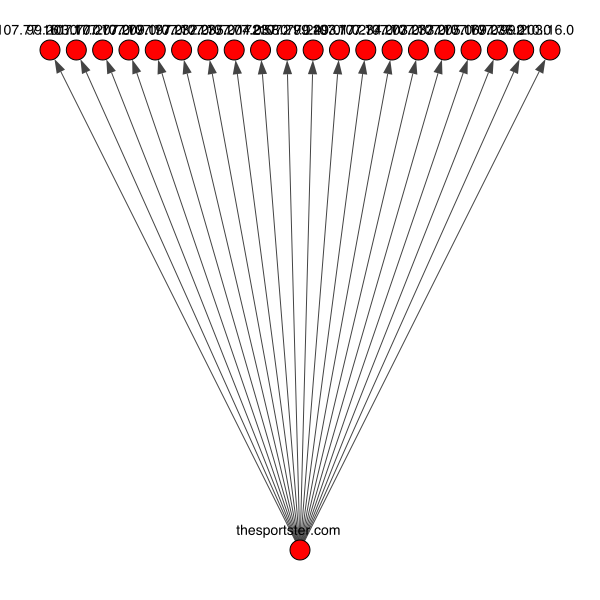

In [150]:
ig_plot(g_bip,**visual_style)

In [156]:
df_edges = gf_domip_filter.edges.sort(F.desc("edge_weight")).limit(20)

<function networkx.drawing.layout.bipartite_layout(G, nodes, align='vertical', scale=1, center=None, aspect_ratio=1.3333333333333333)>

draw_utils draw_nx --
draw_utils draw_nx -- -- despues nx.Graph()
draw_utils draw_nx -- -- despues add_nodes_from src
draw_utils draw_nx -- -- despues add_nodes_from dst
draw_utils draw_nx -- -- Nodes added to B
draw_utils draw_nx -- -- despues de pos.update


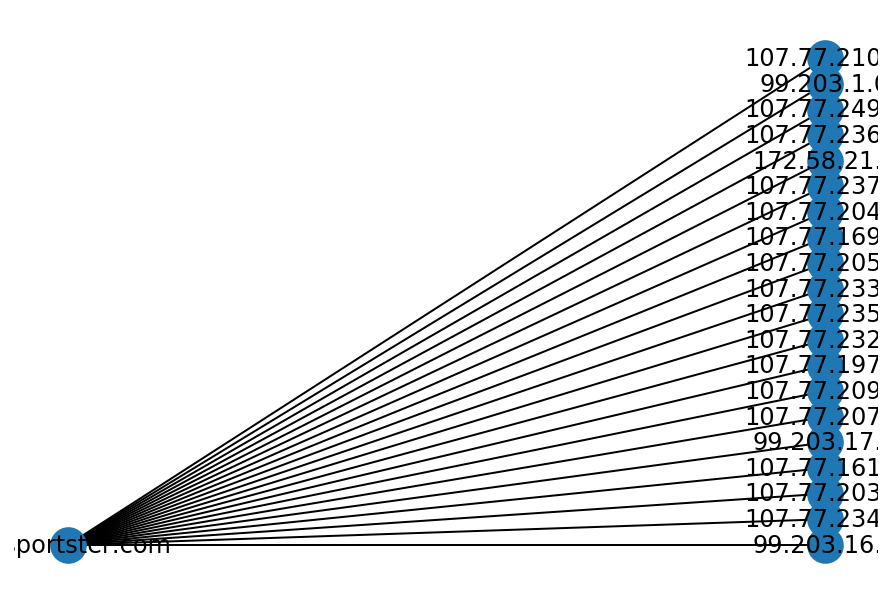

In [181]:
print( "draw_utils draw_nx --" )

df = df_edges.toPandas()  ##GUARRADA

B = nx.Graph()
print( "draw_utils draw_nx -- -- despues nx.Graph()" )

B.add_nodes_from( df['src'], bipartite=1 )
print( "draw_utils draw_nx -- -- despues add_nodes_from src" )

B.add_nodes_from( df['dst'], bipartite=0 )
print( "draw_utils draw_nx -- -- despues add_nodes_from dst" )
#B.add_weighted_edges_from(
#    [(row['src'], row['dst'], 1) for idx, row in df.iterrows()],
#    weight=row[] )

B.add_edges_from( zip( df['src'], df['dst'] ), weight=1 )

print( "draw_utils draw_nx -- -- Nodes added to B" )

# print( B.edges( data=True ) )
# [('test1', 'example.org', {'weight': 1}), ('test3', 'example.org', {'weight': 1}), ('test2', 'example.org', {'weight': 1}),
# ('website.com', 'else', {'weight': 1}), ('site.com', 'something', {'weight': 1})]

pos = {node: [0, i] for i, node in enumerate( df['src'] )}
pos.update( {node: [1, i] for i, node in enumerate( df['dst'] )} )
print( "draw_utils draw_nx -- -- despues de pos.update" )

pos = nx.layout.bipartite_layout(B,df['src'])

nx.draw( B, pos, with_labels=True )
#for p in pos:  # raise text positions
#    pos[p][1] += 0.10
#print( "draw_utils draw_nx -- -- despues for " )
#nx.draw_networkx_labels( B, pos )
#print( "draw_utils draw_nx -- -- ante de plot" )

plt.show()

0     thesportster.com
1     thesportster.com
2     thesportster.com
3     thesportster.com
4     thesportster.com
5     thesportster.com
6     thesportster.com
7     thesportster.com
8     thesportster.com
9     thesportster.com
10    thesportster.com
11    thesportster.com
12    thesportster.com
13    thesportster.com
14    thesportster.com
15    thesportster.com
16    thesportster.com
17    thesportster.com
18    thesportster.com
19    thesportster.com
0         107.77.234.0
1         107.77.237.0
2          99.203.16.0
3         107.77.249.0
4         107.77.232.0
5         107.77.207.0
6         107.77.236.0
7          99.203.17.0
8         107.77.209.0
9         107.77.233.0
10        107.77.169.0
11        107.77.203.0
12        107.77.197.0
13        107.77.235.0
14        107.77.210.0
15        107.77.161.0
16          99.203.1.0
17         172.58.21.0
18        107.77.204.0
19        107.77.205.0
dtype: object